<a href="https://colab.research.google.com/github/PedroConst/EQE-358-Metodos-Numericos/blob/main/Codigos/Interpolacao_Polinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polinômio Interpolador de Newton

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def poli_coeficientes(x, y):
    # Obter os Coeficientes da Interpolação
    n = len(x) - 1
    A = np.zeros((n+1, n+1))
    coeff = np.zeros(n + 1)

    # Matriz das diferenças divididas
    A[:, 0] = y

    for j in range(1, n+1):
        for i in range(0,n+1-j):
            # Calcular as diferenças divididas
            A[i, j] = (A[i+1, j-1] - A[i, j-1]) / (x[i+j] - x[i])

    # Coeficientes são a primeira linha da matriz
    coeff[:] = A[0, :]
    return coeff

def poli_newton(x, xpts, coeff):
    # Encontrar o valor de y da interpolação
    n = len(xpts)-1     # Ordem do polinômio

    # Fórmula recursiva do polinômio de Newton
    p = coeff[n]
    for k in range(1,n+1):
        p = coeff[n-k]+(x-xpts[n-k])*p

    return p



---
**Exemplo**

---



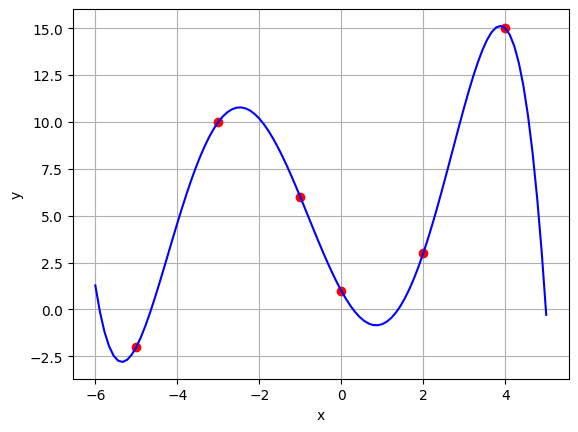

In [12]:
# Inserir dados experimentais
xdados = np.array([-5, -3, -1, 0, 2, 4])
ydados = np.array([-2, 10, 6, 1, 3, 15])

# Obter os coeficientes de Newton (polinômio de ordem n)
coeff = poli_coeficientes(xdados, ydados)

# Definir o novo vetor de pontos
x = np.linspace(-6,5,100)

# Avaliar a interpolação nos novos pontos
y = poli_newton(x, xdados, coeff)

# Plotar o gráfico
plt.figure()
plt.plot(xdados,ydados,'ro')
plt.plot(x,y,'b-')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()